## fivethirtyeight star wars survey

main packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plt.style.use('seaborn-deep')

In [2]:
star_wars = pd.read_csv("starwars.csv", encoding="ISO-8859-1")
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe???,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Removing NaN from the first column

In [3]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]
str_key = list(star_wars.columns)
str_key

['RespondentID',
 'Have you seen any of the 6 films in the Star Wars franchise?',
 'Do you consider yourself to be a fan of the Star Wars film franchise?',
 'Which of the following Star Wars films have you seen? Please select all that apply.',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Which character shot first?',
 'Are you familiar with the Expanded Universe?',
 'Do you consider yourself to be a fan of the Expan

In [4]:
yes_no = {"Yes":True,"No":False}
star_wars[str_key[1]] = star_wars[str_key[1]].map(yes_no)
star_wars[str_key[2]] = star_wars[str_key[2]].map(yes_no)

In [5]:
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [6]:
star_wars = star_wars.rename(columns={
        str_key[3]: "seen_1",
        str_key[4]: "seen_2",
        str_key[5]: "seen_3",
        str_key[6]: "seen_4",
        str_key[7]: "seen_5",
        str_key[8]: "seen_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe???,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [7]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars = star_wars.rename(columns={
        str_key[9]: "ranking_1",
        str_key[10]: "ranking_2",
        str_key[11]: "ranking_3",
        str_key[12]: "ranking_4",
        str_key[13]: "ranking_5",
        str_key[14]: "ranking_6"
        })
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe???,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [8]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

<Container object of 6 artists>

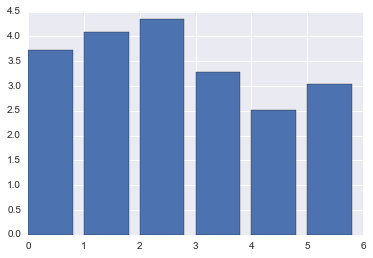

In [9]:
plt.bar(range(6),star_wars[star_wars.columns[9:15]].mean())


## Rankings

So far, we've cleaned up the data, renamed several columns, and computed the average ranking of each movie. As I suspected, it looks like the "original" movies are rated much more highly than the newer ones.

In [10]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<Container object of 6 artists>

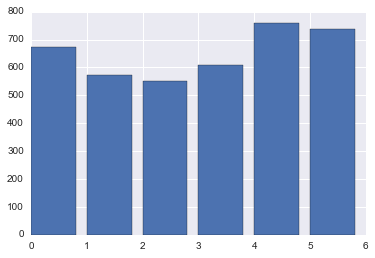

In [11]:
plt.bar(range(6),star_wars[star_wars.columns[3:9]].sum())

## View counts

It appears that the original movies were seen by more respondents than the newer movies. This reinforces what we saw in the rankings, where the earlier movies seem to be more popular.

In [12]:
fans = star_wars[star_wars[str_key[2]] == True]
casuals = star_wars[star_wars[str_key[2]] == False]

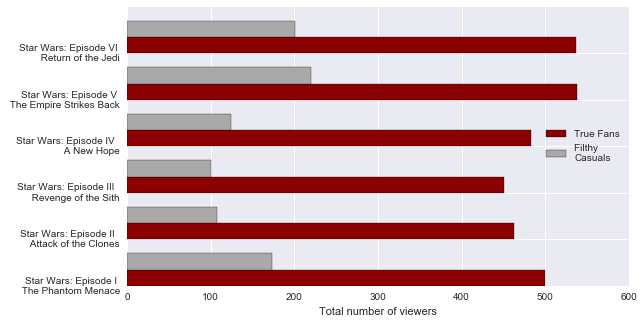

In [13]:
labels = ["Star Wars: Episode I \n The Phantom Menace",
    "Star Wars: Episode II  \n Attack of the Clones",
    "Star Wars: Episode III  \n Revenge of the Sith",
    "Star Wars: Episode IV  \n A New Hope",
    "Star Wars: Episode V \n The Empire Strikes Back",
    "Star Wars: Episode VI \n Return of the Jedi"]
plt.figure(figsize=(9,5))
locs = np.arange(0,6)
offset_locs = locs + 0.35
plt.barh(bottom=locs,height=0.35,width=fans[fans.columns[3:9]].sum(),color='darkred')
plt.barh(bottom=offset_locs,height=0.35,width=casuals[casuals.columns[3:9]].sum(),color='darkgrey')
plt.legend(['True Fans','Filthy \nCasuals'],loc=7)
plt.yticks(locs, labels, rotation=0)
plt.xlabel('Total number of viewers')
#plt.grid(b=False)

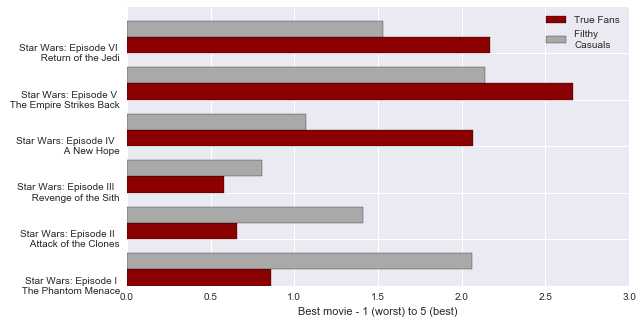

In [14]:
plt.figure(figsize=(9,5))
locs = np.arange(0,6)
offset_locs = locs + 0.35
plt.barh(bottom=locs,height=0.35,width=5 - fans[fans.columns[9:15]].mean(),color='darkred')
plt.barh(bottom=offset_locs,height=0.35,width=5 - casuals[casuals.columns[9:15]].mean(),color='darkgray')
plt.legend(['True Fans','Filthy \nCasuals'])
plt.yticks(locs, labels, rotation=0)
plt.xlabel('Best movie - 1 (worst) to 5 (best)')
#plt.grid(b=False)

[0.639618138424821, 0.5533980582524272, 0.6226053639846744]


(-0.5, 765.5, 1499.5, -0.5)

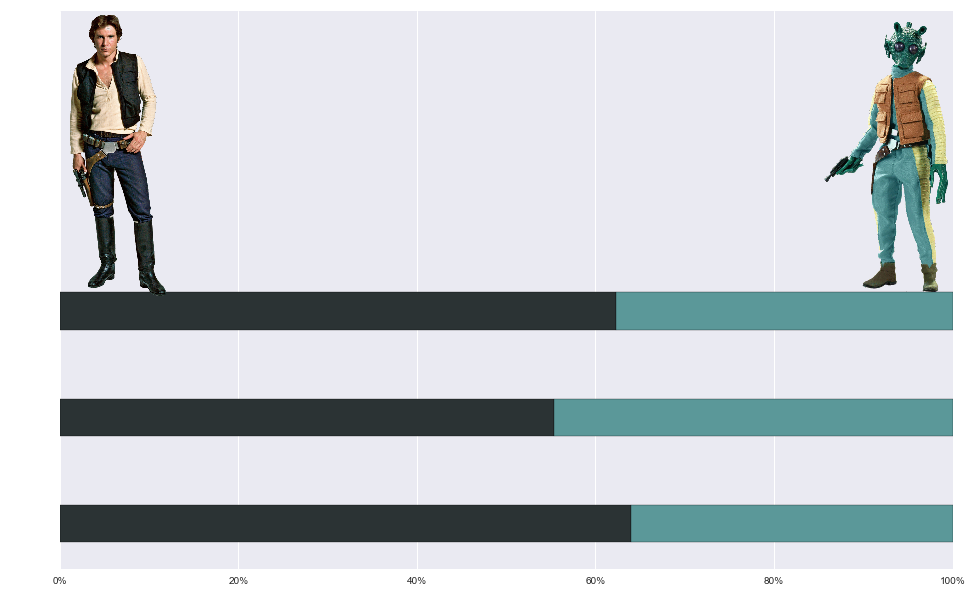

In [15]:
from matplotlib.cbook import get_sample_data


han_f = len([i for i in fans['Which character shot first?'] if i == 'Han'])
greedo_f = len([i for i in fans['Which character shot first?'] if i == 'Greedo'])
han_c = len([i for i in casuals['Which character shot first?'] if i == 'Han'])
greedo_c = len([i for i in casuals['Which character shot first?'] if i == 'Greedo'])
fan_t = han_f + greedo_f
casual_t = han_c + greedo_c
han_t = han_f + han_c
greedo_t = greedo_f + greedo_c
tt = han_t + greedo_t
han = [han_f/fan_t, han_c/casual_t, han_t/tt]
greedo = [greedo_f/fan_t, greedo_c/casual_t, greedo_t/tt]
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(1,1,1)
ax1.barh(np.arange(3),han,height=0.35,color='#2b3334')
ax1.barh(np.arange(3),greedo,height=0.35,color='#5b9899',left=han)
ax1.set(ylim=[-0.25, 5],xlim=[0, 1])
ax1.set_xticklabels(['0%','20%','40%','60%','80%','100%'])
ax1.xaxis.set_ticks_position('none') 
ax1.yaxis.set_visible(False) 
print(han)
im = plt.imread(get_sample_data('C:\\Users\\Júlio\\greedo.gif'))
newax = fig.add_axes([0.7, 0.505, 0.2, 0.38], anchor='E')
newax.imshow(im)
newax.axis('off')
im = plt.imread(get_sample_data('C:\\Users\\Júlio\\hansolo.gif'))
newax = fig.add_axes([0.105, 0.5, 0.2, 0.4], anchor='W')
newax.imshow(im)
newax.axis('off')

In [16]:
print(plt.style.available)

['seaborn-bright', 'seaborn-ticks', 'seaborn-paper', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-dark', 'seaborn-whitegrid', 'seaborn-notebook', 'seaborn-dark-palette', 'seaborn-poster', 'bmh', 'seaborn-talk', 'fivethirtyeight', 'dark_background', 'seaborn-colorblind', 'seaborn-pastel', 'seaborn-white', 'seaborn-muted', 'classic', 'grayscale', 'ggplot']
